# IMDB - Embedding with LSTM
> ## NLP(Natural Language Processing)

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Import Tensorflow

In [4]:
import tensorflow

tensorflow.__version__

'2.5.0'

# I. IMDB Data_Set Load & Review

> ## 1) Load IMDB Data_Set

* Word to Vector
* 전체 데이터 내에서 단어의 사용빈도에 따라 인덱스화
* 정수 인덱스 '11'은 11번째로 자주 사용된 단어를 나타냄
* num_words = 10000 : 인덱스 값 10000 이하의 단어만 추출
* 단어 인덱스 값이 10000을 넘지 않는 단어만 분석에 사용

In [5]:
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


> ## 2) Visualization & Frequency(Optional)

* x - Histogram(리뷰 길이)

리뷰 최대 길이 : 2494
리뷰 평균 길이 : 238.71364


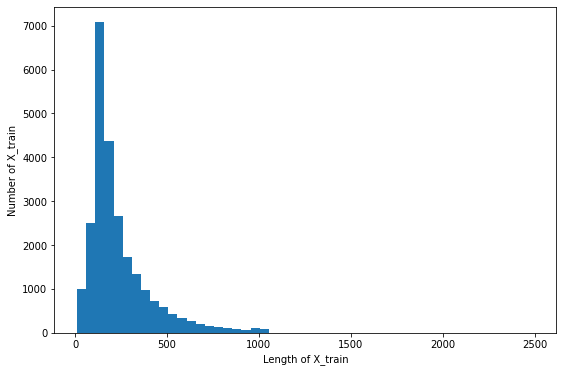

In [6]:
import matplotlib.pyplot as plt

print('리뷰 최대 길이 :', max(len(L) for L in X_train))
print('리뷰 평균 길이 :', sum(map(len, X_train))/len(X_train))

plt.figure(figsize = (9, 6))
plt.hist([len(L) for L in X_train], bins = 50)
plt.xlabel('Length of X_train')
plt.ylabel('Number of X_train')
plt.show()

* y - Frequency(0:부정, 1:긍정)

In [7]:
import numpy as np

unique_elements, counts_elements = np.unique(y_train, return_counts = True)

print('Label 빈도수:')
print(np.asarray((unique_elements, counts_elements)))

Label 빈도수:
[[    0     1]
 [12500 12500]]


# II. Tensor Transformation

> ## 1) X_train & X_test : (25000, 10000)

* vectorization
 * (25000, 10000)

In [8]:
from tensorflow.keras import preprocessing

X_train = preprocessing.sequence.pad_sequences(X_train, maxlen = 10000)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen = 10000)

X_train.shape, X_test.shape

((25000, 10000), (25000, 10000))

* Transformation Check

In [9]:
print(X_train[0][:21])
print(X_train[0][9979:])

print(X_test[0][:21])
print(X_test[0][9979:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 226   65   16   38 1334   88   12   16  283    5   16 4472  113  103
   32   15   16 5345   19  178   32]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  14  286  170    8  157   46    5   27  239   16  179    2   38   32
   25 7944  451  202   14    6  717]


> ## 2) y_train & y_test

In [10]:
y_train = np.asarray(y_train).astype(float)
y_test = np.asarray(y_test).astype(float)

print(y_train[:21])
print(y_test[:21])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
[0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


# III. Keras Embedding Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - Embedding Dimension : 32

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

imdb = models.Sequential()

imdb.add(layers.Embedding(10000, 32, input_length = 10000))

imdb.add(layers.LSTM(8))
imdb.add(layers.Dropout(0.5))
imdb.add(layers.Dense(1, activation = 'sigmoid'))

* 모델 구조 확인

In [12]:
imdb.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10000, 32)         320000    
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 321,321
Trainable params: 321,321
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [13]:
imdb.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

> ## 3) Model Fit

* 약 20분

In [14]:
%%time

Hist_imdb = imdb.fit(X_train, y_train,
                     epochs = 25,
                     batch_size = 512,
                     validation_data = (X_test, y_test))

Epoch 1/25
49/49 [==============================] - 48s 808ms/step - loss: 0.6730 - accuracy: 0.6398 - val_loss: 0.5920 - val_accuracy: 0.7162
Epoch 2/25
49/49 [==============================] - 39s 810ms/step - loss: 0.5102 - accuracy: 0.8185 - val_loss: 0.4708 - val_accuracy: 0.8252
Epoch 3/25
49/49 [==============================] - 39s 802ms/step - loss: 0.4362 - accuracy: 0.8582 - val_loss: 0.4302 - val_accuracy: 0.8375
Epoch 4/25
49/49 [==============================] - 39s 807ms/step - loss: 0.3848 - accuracy: 0.8768 - val_loss: 0.3919 - val_accuracy: 0.8457
Epoch 5/25
49/49 [==============================] - 39s 798ms/step - loss: 0.3420 - accuracy: 0.8959 - val_loss: 0.3650 - val_accuracy: 0.8594
Epoch 6/25
49/49 [==============================] - 39s 807ms/step - loss: 0.3128 - accuracy: 0.9067 - val_loss: 0.3704 - val_accuracy: 0.8473
Epoch 7/25
49/49 [==============================] - 39s 807ms/step - loss: 0.2965 - accuracy: 0.9088 - val_loss: 0.4156 - val_accuracy: 0.8186

> ## 4) 학습 결과 시각화

* Loss Visualization

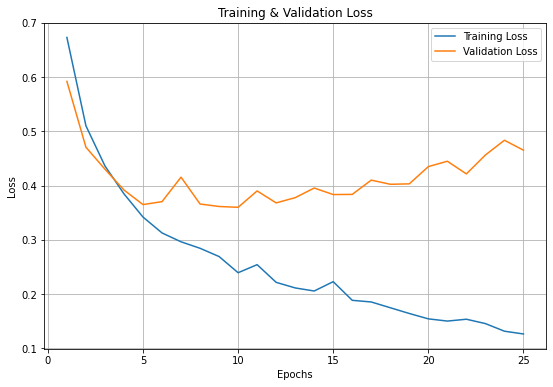

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_imdb.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_imdb.history['loss'])
plt.plot(epochs, Hist_imdb.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Accuracy Visualization

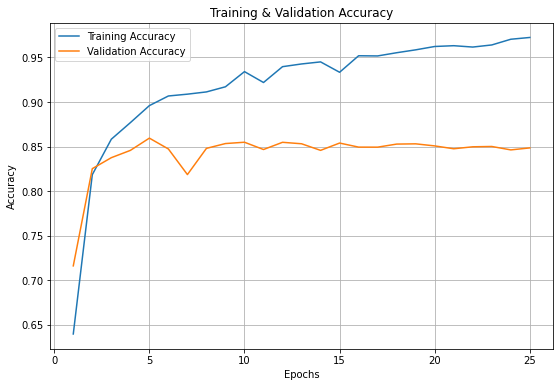

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_imdb.history['accuracy']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_imdb.history['accuracy'])
plt.plot(epochs, Hist_imdb.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [17]:
loss, accuracy = imdb.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

782/782 [==============================] - 90s 115ms/step - loss: 0.4653 - accuracy: 0.8485
Loss = 0.46529
Accuracy = 0.84848


# 
# 
# 
# The End
# 
# 
# 